In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# creating variables to store the r2_score() and mean_squared_error() functions
def results(x,y):
    """
    x stands for y_test
    and y stands for y_pred
    """
    r2 = r2_score(x,y)
    mse = mean_squared_error(x,y)
    print(f"R2 : {r2} \n MSE : {mse}")

## Supervised

### Filter Based Methods

**Mutual Information**

In [3]:
dataset = fetch_california_housing()

In [4]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [6]:
x = dataset['data']
y = dataset ['target']
feature_names = dataset['feature_names']

In [7]:
x.shape

(20640, 8)

In [8]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x,y)

In [9]:
x.shape

(20640, 8)

In [10]:
print(mi)

[0.38760005 0.02992384 0.10313375 0.02407164 0.02150132 0.07215875
 0.37304579 0.40149428]


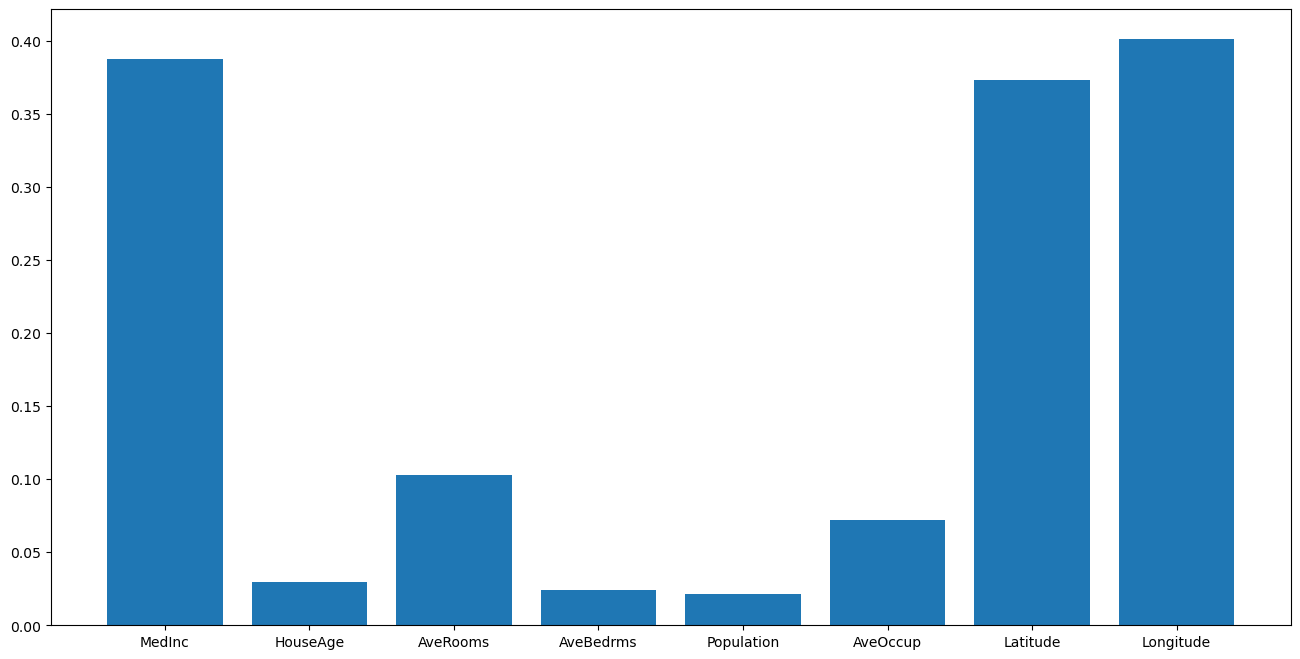

In [11]:
# Visualize Feature Selection
plt.figure(figsize = (16, 8))
plt.bar(feature_names,mi)
plt.show()

#### We have two options - we could use either SelectPercentile() or SelectBest() classes to select the best features from the above mutual information.

In [12]:
X_new = SelectKBest(mutual_info_regression, k = 5).fit_transform(x, y)
print(X_new.shape)

(20640, 5)


In [13]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20))

In [14]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
results(y_test,y_pred)

R2 : 0.5828976246064337 
 MSE : 0.5742637467271534


#### The second , filter based method is Chi Squared , but it can be used only for classification , so we move ahead with the third method - Pearson Correlation 

**we can do this in two ways**

**(a) first analyse each feature with the target variable.**


In [15]:

from sklearn.feature_selection import f_regression, SelectKBest

In [16]:
X_new = SelectKBest(f_regression, k=5).fit_transform(x,y)

In [17]:
print(X_new.shape)

(20640, 5)


In [18]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20))

In [19]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
results(y_test,y_pred)

R2 : 0.56789679374878 
 MSE : 0.5733361093423422


**(b)Let us analyse the relationship between the feature themselves using the corr() method of the pandas library**

In [20]:
import pandas as pd

In [21]:
x_pd = pd.DataFrame(x, columns = feature_names)
x_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
x_pd.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


**It is very clear that there is correlation between AveRooms and AveBedrms and ofcourse Latitude and Longitude are negatively correlated**

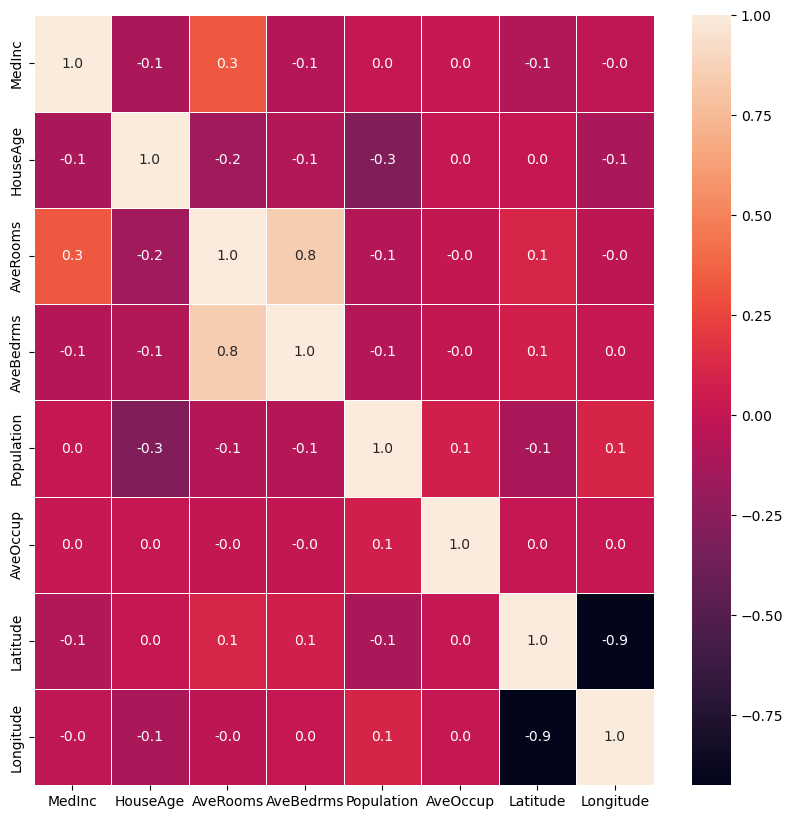

In [23]:
# how ever let us visualize these correlations 
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(x_pd.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

In [24]:
# let us drop AveBedrooms
x_new = x_pd.drop('AveBedrms',axis =1)
x_new.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25


In [25]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20))
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
results(y_test,y_pred)

R2 : 0.5290266878526162 
 MSE : 0.6300751632757922


## Next we will employ the Wrapper Based Methods for feature selection

### Recursive Feature Elimination

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

#Regression
print(x.shape, y.shape) # remember x is the training dataset set of the California housing dataset and 
#y is the target 'house value'


(20640, 8) (20640,)


In [27]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [28]:
X, y = fetch_california_housing(return_X_y = True)
feature_names = fetch_california_housing().feature_names


In [29]:
estimator = Lasso()
selector = RFE(estimator, n_features_to_select = 5, step =1).fit(X,y)
print(selector.ranking_)
print(selector)
print(selector.get_feature_names_out())

[1 1 4 3 1 2 1 1]
RFE(estimator=Lasso(), n_features_to_select=5)
['x0' 'x1' 'x4' 'x6' 'x7']


In [30]:
X_new = selector.transform(X)
print(X_new.shape)

(20640, 5)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.20)

In [32]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
results(y_test,y_pred)

R2 : 0.6035087118195464 
 MSE : 0.5280015215894542


### Select From Model

In [33]:
# Using estimators that assign weights to the features
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = np.logspace(-6,6, num=5)).fit(X,y)
importance = np.abs(ridge.coef_)
feature_names = np.array(feature_names)

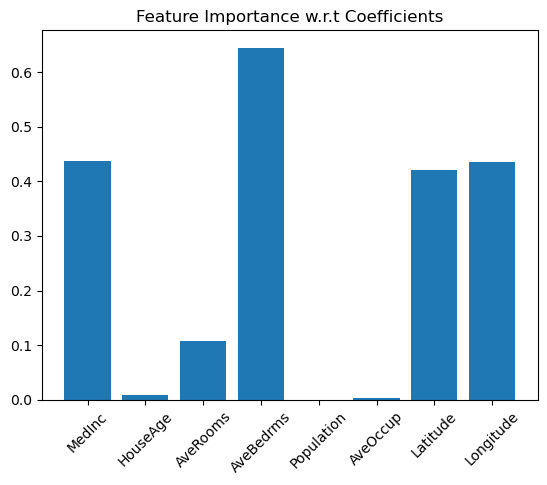

In [34]:
plt.bar(height = importance,x = feature_names)
plt.title("Feature Importance w.r.t Coefficients")
plt.xticks(rotation = 45)
plt.show()

**selecting features based on importance**
we select the top 4 important features according to the coefficients.

In [35]:
from sklearn.feature_selection import SelectFromModel
threshold = np.sort(importance)[-5] + 0.01 # we want to set the threshold of the 5th highest coefficient sightly large,
# so that SelectFromModel() class will select the top 4.
model_select = SelectFromModel(estimator, threshold = threshold).fit(X,y)
print(f"Features selected by SelectFromModel : {feature_names[model_select.get_support()]}")

Features selected by SelectFromModel : ['MedInc']


### Sequential Feature Selection

In [36]:
from sklearn.feature_selection import SequentialFeatureSelector
X,y = fetch_california_housing(return_X_y=True)
# ridge = RidgeCV().fit(X,y)

In [37]:
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select = 4, direction ="forward").fit(X,y)
sfs_backward = SequentialFeatureSelector(ridge,n_features_to_select=4, direction ="backward").fit(X,y)
print(f"Features selected by forward sequential selection : {feature_names[sfs_forward.get_support()]}")
print(f"Features selected by backward sequential selection : {feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection : ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms']
Features selected by backward sequential selection : ['MedInc' 'HouseAge' 'Latitude' 'Longitude']


Note that the forward and backward sequential selection have come up with different set of features.

In [38]:
sfs_forward

SequentialFeatureSelector(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])),
                          n_features_to_select=4)

**First we will try with the features from the sfs_forward object**

In [39]:
X_new = sfs_forward.transform(X)
X_new.shape

(20640, 4)

In [40]:
## let us use these set of features on the Linear Regression model
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2 )
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
results(y_test, y_pred)

R2 : 0.5360847018086788 
 MSE : 0.6156809400214672


**Now we will try with the features from sfs_backward object**

In [41]:
X_new = sfs_backward.transform(X)
X_new.shape

(20640, 4)

In [42]:
## Let us use these set of features on the Linear Regression model
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
results(y_test, y_pred)

R2 : 0.5963780854515959 
 MSE : 0.5158321616741172


**As we can see that now we have a lower MSE and a high R2 score from the backward selection when compared to  forward selection**

### Next we will try the Supervised - Embedded method (Random Forest) for feature selection

https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

### Next we will try the Supervised - Embedded method (Lasso) for feature selection

In [43]:
X , y = fetch_california_housing(return_X_y=True)
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size =0.2)

In [44]:
w = []
r2 = []
mse =[]
alpha_list = [0, 0.1,0.25, 0.5,1, 2]

for alpha in alpha_list:
    #fit model
    model = Lasso(alpha = alpha)
    model.fit(x_train, y_train)
    
    # prediction
    y_pred = model.predict(x_test)
    
    # store metrics for prediction, for each fit
    r2.append(r2_score(y_test, y_pred))
    w.append(model.coef_.tolist())
    mse.append(mean_squared_error(y_test,y_pred))

C:\Users\vasan\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\vasan\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vasan\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.345e+03, tolerance: 2.198e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

In [45]:
feature_names = fetch_california_housing().feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

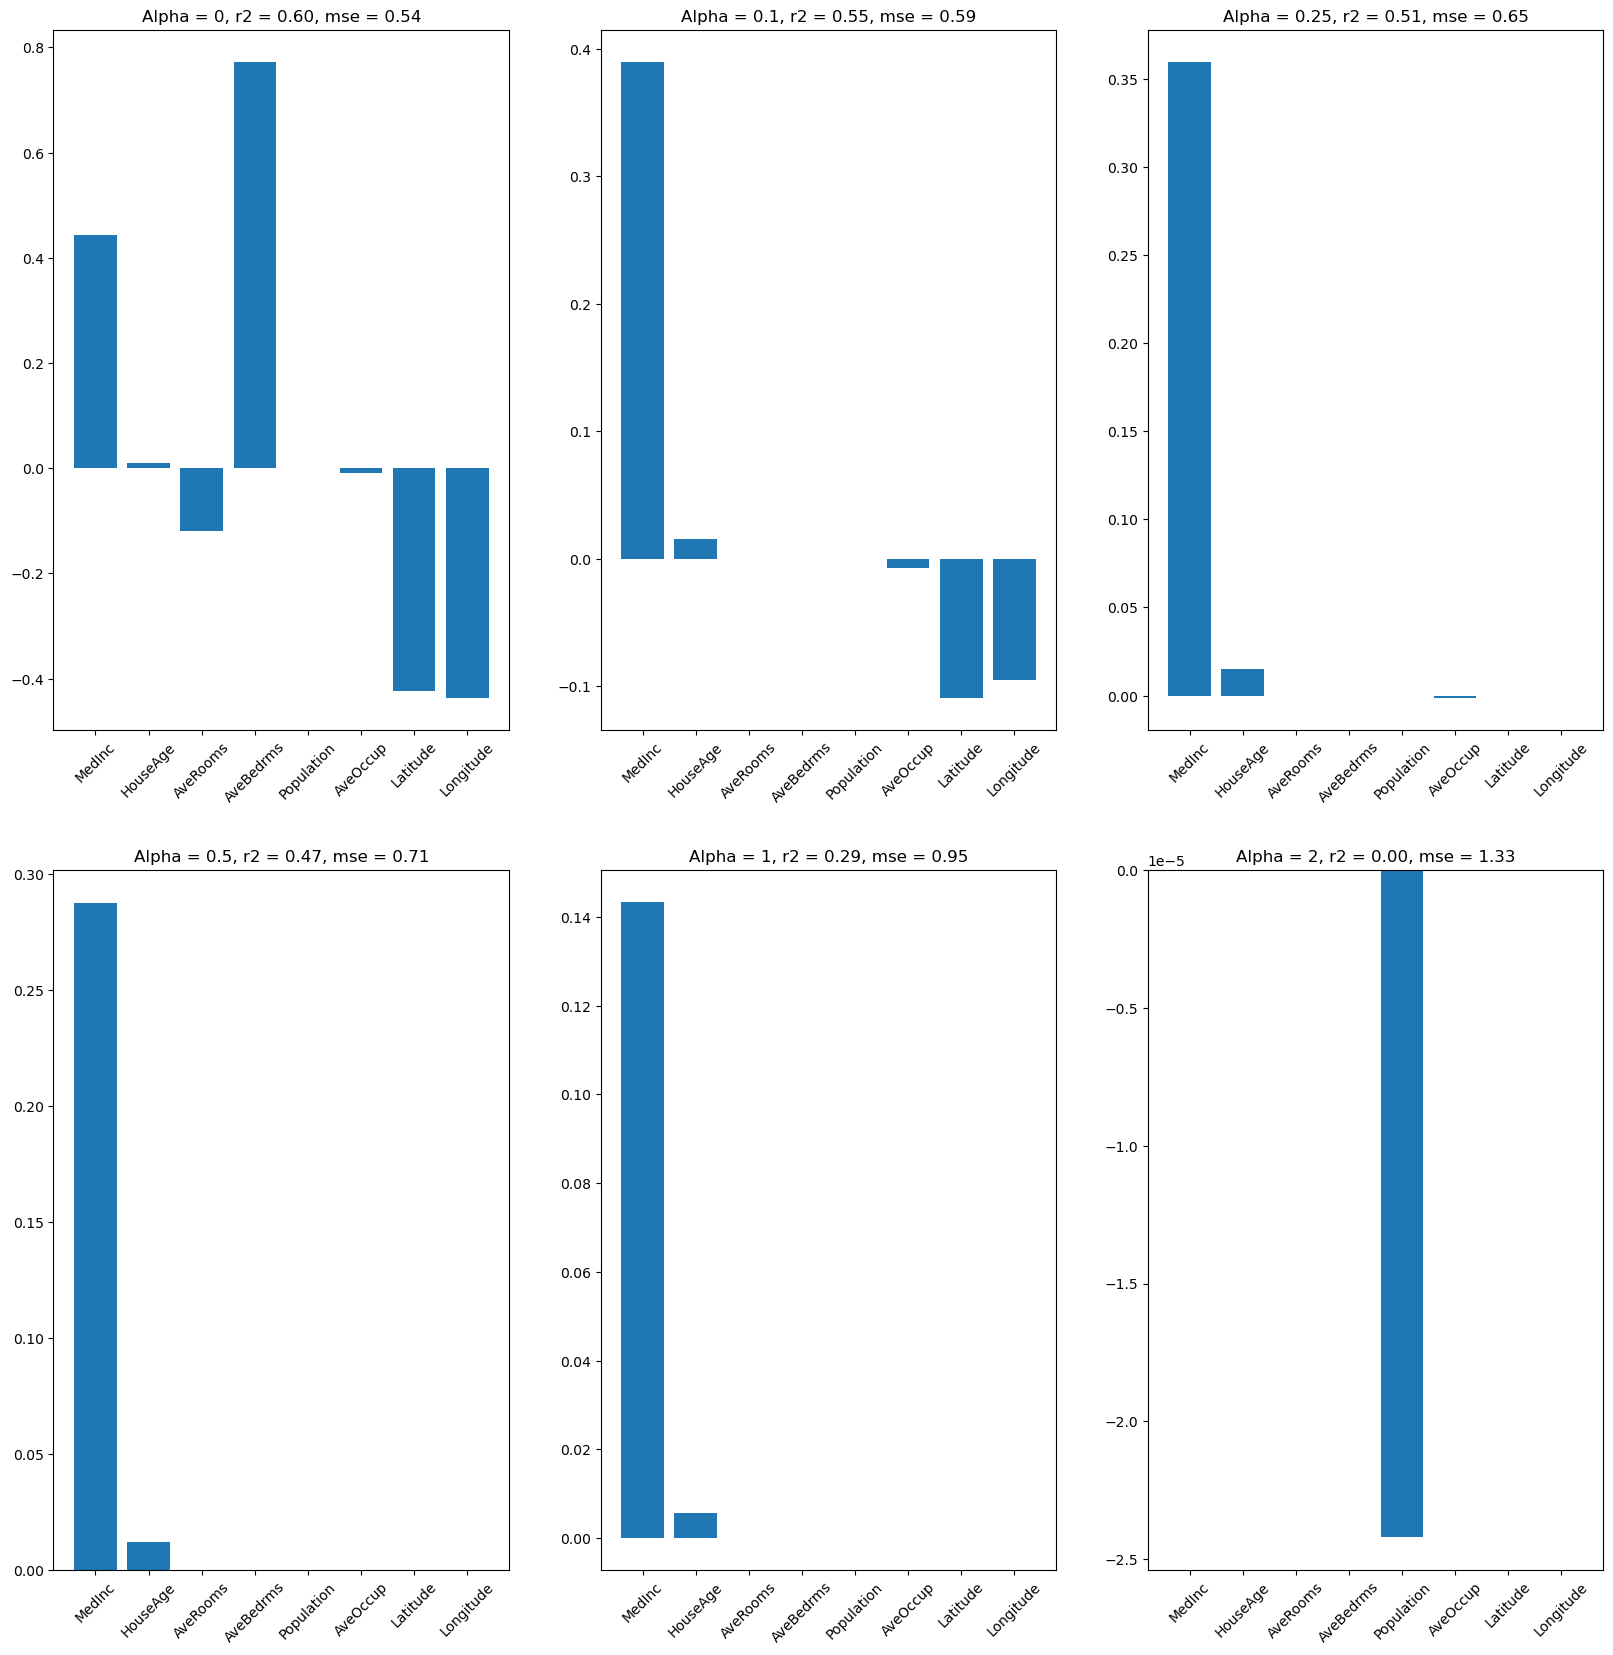

In [46]:
# visualizing feature selection
plt.figure(figsize=(20, 20))
for i in range(len(alpha_list)):
    plt.subplot(2, 3, i+1)
    plt.bar(feature_names,w[i])
    plt.xticks(rotation=45)
    plt.title(f"Alpha = {alpha_list[i]}, r2 = {r2[i]:.2f}, mse = {mse[i]:.2f}")
plt.show()

### from the above graph, median income seems to be the most important feature, followed by house age and then by the geographical place of the house. We can also notice that the r2 scores starts dropping after removing more than 5  features

### UnSupervised - Dimensionality Reduction

**PCA**

In [47]:
from sklearn.decomposition import PCA
X , y = fetch_california_housing(return_X_y=True)
X_new = PCA(n_components =4, svd_solver = 'full').fit_transform(X)
print(X_new.shape)

(20640, 4)


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2 )
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
results(y_test, y_pred)

R2 : 0.008760166072316555 
 MSE : 1.3549503319733254
